In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers=['COGN3.SA', 'BBDC4.SA', 'VVAR3.SA', 'ITUB4.SA']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,'yahoo','2019-1-1')['Adj Close']

In [4]:
mydata.iloc[0]

COGN3.SA     9.141588
BBDC4.SA    31.147285
VVAR3.SA     4.380000
ITUB4.SA    34.435410
Name: 2019-01-02 00:00:00, dtype: float64

#                                         Gráfico Retorno

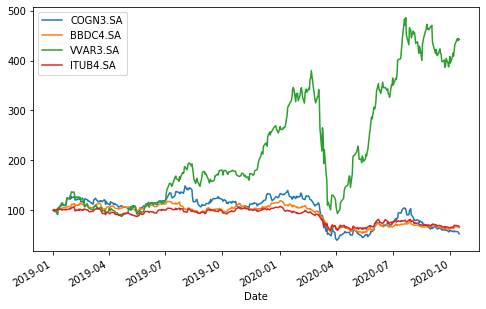

In [5]:
(mydata/mydata.iloc[0]*100).plot(figsize=(8,5))
plt.show()

In [17]:
pesos=np.array([0.5, 0.15, 0.25, 0.1 ])

In [18]:
retorno=(mydata/mydata.shift(1))-1

In [19]:
retorno_anual=retorno.mean()*250

## Retorno Anual Médio

In [20]:
portfolio=str(round(np.dot(retorno_anual,pesos),4)*100) + ' %'
print(portfolio)

18.25 %


#                                            Análise Vol

In [10]:
retorno_vol=np.log(mydata/mydata.shift(1))

## Volatilidade Diária

In [22]:
vol_d=retorno_vol[["COGN3.SA", 'BBDC4.SA', 'VVAR3.SA', 'ITUB4.SA']].std()
vol_d

COGN3.SA    0.042770
BBDC4.SA    0.028185
VVAR3.SA    0.050018
ITUB4.SA    0.024137
dtype: float64

## Volatilidade Anual

In [23]:
vol_a=vol_d*250**0.5
vol_a

COGN3.SA    0.676255
BBDC4.SA    0.445651
VVAR3.SA    0.790846
ITUB4.SA    0.381637
dtype: float64

## Volatilidade Carteira

In [24]:
vol_cart=(np.dot(pesos.T,np.dot(retorno.cov()*250,pesos)))**0.5
print(str(round(vol_cart,4)*100)+ ' %')

53.269999999999996 %


# Beta

In [25]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

acoes = ['ITUB4.SA', '^BVSP']
data = pd.DataFrame()
for t in acoes:
    data[t] = wb.DataReader(t, 'yahoo', '2015-1-1')['Adj Close']  
    
retorno = np.log( data / data.shift(1) )
cov = retorno.cov() * 250
cov_mercado = cov.iloc[0,1]
var_mercado = retorno['^BVSP'].var() * 250

beta = cov_mercado / var_mercado
beta

1.0102785283883553

# CAPM

In [26]:
capm=0.025*beta**0.05
print(str(round(capm,3)*100)+ ' %')

2.5 %


# Sharpe

In [28]:
Sharpe = (capm - 0.025) / (retorno['ITUB4.SA'].std() * 250 ** 0.5)
Sharpe

3.842873749785347e-05